## 3-D Triangle Analysis: Right-Angle Detection for Surface Normal Estimation
Name: Divya Natekar

Net ID: dyn2009

NYU ID: N19974330
### What does this program cover?
I wanted a tool where-in I could verify whether three points formed a right-angled triangle. As in LiDAR scans, right angles often hint at structural boundaries (such as walls, floor intersections, steps or ledges). By building this right-angled detector, we can observe how certain features in 3-D space could be useful for segmentation and understanding the object outlines.

#### i. Import the libraries

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


#### ii. Loading and cleaning our original dataset

In [2]:
# Load the 'reduced' sheet from Google Sheets and extract x, y
url = 'https://docs.google.com/spreadsheets/d/1io-mxKbNpP8YIhzwwsWFRvGTvry2Ao0j/export?format=csv&gid=836186177'
df = pd.read_csv(url)
df = df[['x', 'y']].copy()
df.columns = ['X', 'Y']
df['X'] = pd.to_numeric(df['X'], errors='coerce')
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')
df = df.dropna(subset=['X', 'Y']).reset_index(drop=True)


#### iii. Sort the data by X and Y coordinates

In [3]:
# Sort the data for consistent processing
df_sorted = df.sort_values(by=['X', 'Y']).reset_index(drop=True)


#### iv. Defining the scanner (triangle) height

In [4]:
# Use maximum Y as the triangle height
triangle_height = df_sorted['Y'].max()


#### v. Identify points inside 90 degree triangle

In [5]:
# For 90° right-angled triangle, keep points where -Y <= X <= Y and Y >= 0
inside_mask = (df_sorted['Y'] >= 0) & (df_sorted['X'] >= -df_sorted['Y']) & (df_sorted['X'] <= df_sorted['Y'])
inside_points = df_sorted[inside_mask]
outside_points = df_sorted[~inside_mask]


#### vi. Plot for points inside and outside the triangle

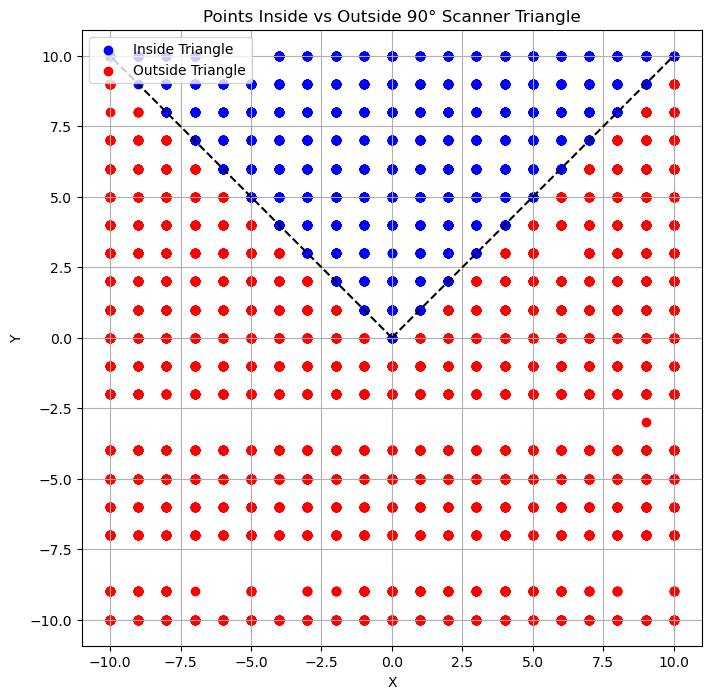

In [6]:
# Plot the triangle and points inside/outside
plt.figure(figsize=(8, 8))
plt.scatter(inside_points['X'], inside_points['Y'], color='blue', label='Inside Triangle')
plt.scatter(outside_points['X'], outside_points['Y'], color='red', label='Outside Triangle')

# Draw triangle edges
plt.plot([0, -triangle_height], [0, triangle_height], 'k--')  # Left side
plt.plot([0, triangle_height], [0, triangle_height], 'k--')   # Right side

plt.title("Points Inside vs Outside 90° Scanner Triangle")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend()
plt.axis('equal')
plt.show()
